In [34]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score

Učitavanje podataka iz Iris skupa

In [4]:
X = load_iris().data
y = load_iris().target

Izdvajanje PC koordinata za potrebe vizualizacije

In [5]:
pca = PCA()
X_pca = pca.fit_transform(X)

Provera kvaliteta odabranih PC koordinata - udeo objašnjene varijanse pomoću prve dve koordinate

In [7]:
pca.explained_variance_ratio_[:2].sum()

0.977685206318795

Vizualizacija Iris skupa pomoću PC koordinata u odnosu na oznake klasa

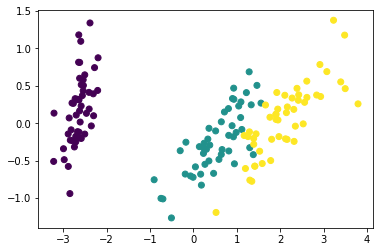

In [8]:
_ = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

## KMeans

KMeans algoritam sa "random" inicijalizacijom

In [16]:
km = KMeans(n_clusters=3, n_init=100, max_iter=500, init='random')
_ = km.fit(X)

Vizualizacija klastera dobijenih korišćenjem KMeans algoritma

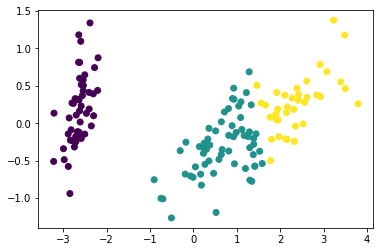

In [17]:
_ = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=km.labels_)

Provera kvaliteta klastera dobijenih KMeans algoritmom

In [15]:
# Silueta
silhouette_score(X, km.labels_, metric='euclidean')

0.5528190123564095

In [18]:
# Homogenost klastera
homogeneity_score(labels_true=y, labels_pred=km.labels_)

0.7514854021988338

## DBSCAN

Kako su dva klastera vrlo bliska i približnih gustina, DBSCAN ne uspeva da ih ispravno razdvoji, ali uspešno pronalazi elemente van granica

In [20]:
# Testirati grid search za pronalaženje optimalnijih parametara
db = DBSCAN(eps=0.7, min_samples=15)
_ = db.fit(X)

Vizualizacija klastera dobijenih korišćenjem DBSCAN algoritma

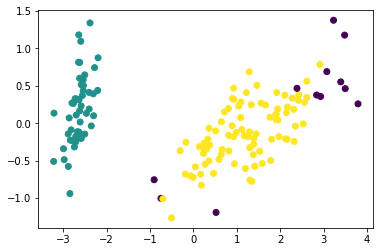

In [21]:
# Tamne tačke označavaju elemente van granica
_ = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db.labels_)

Provera kvaliteta klastera dobijenih DBSCAN algoritmom

In [23]:
# Silueta
silhouette_score(X, db.labels_, metric='euclidean')

0.5248485709283643

In [24]:
# Homogenost klastera
homogeneity_score(labels_true=y, labels_pred=db.labels_)

0.599254755758564

## Hijerarhijsko klasterovanje

In [49]:
ac = AgglomerativeClustering(n_clusters=3, linkage='ward')
ac.fit(X)

# Fitovanje modela za iscrtavanje kompletnog dendrograma
ac_full = AgglomerativeClustering(
    n_clusters=None, 
    distance_threshold=0, 
    linkage='ward'
)
fitted_ac_full = ac_full.fit(X)

Vizualizacija klastera dobijenih korišćenjem hijerarhijskog klasterovanja

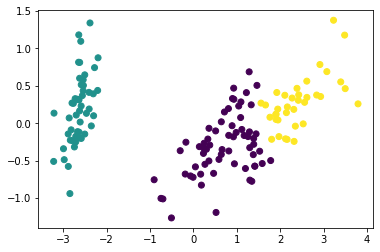

In [39]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=ac.labels_)

Provera kvaliteta klastera dobijenih hijerarhijskim klasterovanjem

In [40]:
# Silueta
silhouette_score(X, ac.labels_, metric='euclidean')

0.5543236611296419

In [41]:
# Homogenost klastera
homogeneity_score(labels_true=y, labels_pred=ac.labels_)

0.7608008469718723

In [42]:
# Funkcija za crtanje dendrigrama
# preuzeta sa: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Prikaz kompletnog dendrograma

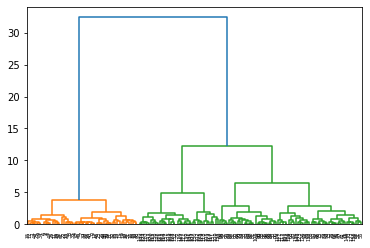

In [50]:
plot_dendrogram(fitted_ac_full)

## Spektralno klasterovanje

Model interno konstruiše graf, moguće je izračunati odvojeno graf najbližih suseda (više o tome u drugom delu)

In [52]:
sc = SpectralClustering(n_clusters=3)
_ = sc.fit(X)

Vizualizacija klastera dobijenih korišćenjem spektralnog klasterovanja

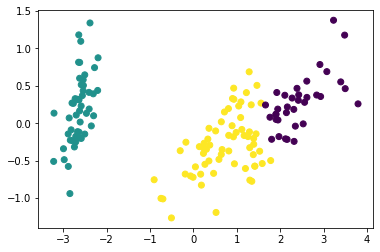

In [54]:
_ = plt.scatter(X_pca[:,0], X_pca[:,1], c=sc.labels_)

Provera kvaliteta klastera dobijenih spektralnim klasterovanjem

In [56]:
# Silueta
silhouette_score(X, sc.labels_, metric='euclidean')

0.5553062646081594

In [57]:
# Homogenost klastera
homogeneity_score(labels_true=y, labels_pred=sc.labels_)

0.7869234996582516